In [34]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time module.
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [16]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | we
City not found. Skipping...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | mbanza-ngungu
Processing Record 5 of Set 1 | yerani
City not found. Skipping...
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | nemuro
Processing Record 10 of Set 1 | riyadh
Processing Record 11 of Set 1 | evensk
Processing Record 12 of Set 1 | turcianske teplice
Processing Record 13 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 14 of Set 1 | hay river
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | muzhi
Processing Record 18 of Set 1 | koumac
Processing Record 19 of Set 1 | cape town
Processing Re

Processing Record 37 of Set 4 | charlottetown
Processing Record 38 of Set 4 | santa cruz de tenerife
Processing Record 39 of Set 4 | kaili
Processing Record 40 of Set 4 | karratha
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | missoula
Processing Record 43 of Set 4 | jackson
Processing Record 44 of Set 4 | phaltan
Processing Record 45 of Set 4 | saint-philippe
Processing Record 46 of Set 4 | buala
Processing Record 47 of Set 4 | falmouth
Processing Record 48 of Set 4 | roald
Processing Record 49 of Set 4 | new norfolk
Processing Record 50 of Set 4 | nenjiang
Processing Record 1 of Set 5 | dargaville
Processing Record 2 of Set 5 | puerto escondido
Processing Record 3 of Set 5 | nyurba
Processing Record 4 of Set 5 | bethel
Processing Record 5 of Set 5 | atar
Processing Record 6 of Set 5 | kaitangata
Processing Record 7 of Set 5 | talaya
Processing Record 8 of Set 5 | volokonovka
Processing Record 9 of Set 5 | spornoye
Processing Record 10 of Set 5 | guhagar
Pro

Processing Record 28 of Set 8 | cap malheureux
Processing Record 29 of Set 8 | talcahuano
Processing Record 30 of Set 8 | butka
Processing Record 31 of Set 8 | yakeshi
Processing Record 32 of Set 8 | conceicao do araguaia
Processing Record 33 of Set 8 | tefe
Processing Record 34 of Set 8 | saleaula
City not found. Skipping...
Processing Record 35 of Set 8 | shache
Processing Record 36 of Set 8 | baboua
City not found. Skipping...
Processing Record 37 of Set 8 | pedernales
Processing Record 38 of Set 8 | tessalit
Processing Record 39 of Set 8 | ixtapa
Processing Record 40 of Set 8 | rocha
Processing Record 41 of Set 8 | talnakh
Processing Record 42 of Set 8 | xuddur
Processing Record 43 of Set 8 | bikapur
Processing Record 44 of Set 8 | sokoni
Processing Record 45 of Set 8 | chiplun
Processing Record 46 of Set 8 | gangotri
City not found. Skipping...
Processing Record 47 of Set 8 | barawe
City not found. Skipping...
Processing Record 48 of Set 8 | altay
Processing Record 49 of Set 8 | h

Processing Record 14 of Set 12 | malanje
Processing Record 15 of Set 12 | ust-kan
Processing Record 16 of Set 12 | inirida
Processing Record 17 of Set 12 | ferrol
Processing Record 18 of Set 12 | kingisepp
Processing Record 19 of Set 12 | dolinsk
Processing Record 20 of Set 12 | imbituva
Processing Record 21 of Set 12 | barcelos
Processing Record 22 of Set 12 | lahij
Processing Record 23 of Set 12 | kavaratti
Processing Record 24 of Set 12 | tilichiki
Processing Record 25 of Set 12 | baghdad
Processing Record 26 of Set 12 | abu jubayhah
City not found. Skipping...
Processing Record 27 of Set 12 | itoman
Processing Record 28 of Set 12 | waingapu
Processing Record 29 of Set 12 | coihaique
Processing Record 30 of Set 12 | kochubey
Processing Record 31 of Set 12 | alofi
Processing Record 32 of Set 12 | sagarejo
Processing Record 33 of Set 12 | pemangkat
Processing Record 34 of Set 12 | praia da vitoria
Processing Record 35 of Set 12 | saint-georges
Processing Record 36 of Set 12 | solhan
P

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,42.12,73,20,11.50,CL,2021-07-20 20:15:07
1,Mbanza-Ngungu,-5.2500,14.8667,74.23,40,1,4.47,CD,2021-07-20 20:17:54
2,Ribeira Grande,38.5167,-28.7000,72.00,83,40,16.11,PT,2021-07-20 20:17:54
3,Busselton,-33.6500,115.3333,53.10,93,100,12.59,AU,2021-07-20 20:13:17
4,Port Alfred,-33.5906,26.8910,56.71,81,100,27.51,ZA,2021-07-20 20:17:54
5,Nemuro,43.3236,145.5750,59.83,97,98,7.87,JP,2021-07-20 20:14:16
6,Riyadh,24.6877,46.7219,96.94,18,100,5.50,SA,2021-07-20 20:17:14
7,Evensk,61.9500,159.2333,53.58,83,97,3.91,RU,2021-07-20 20:17:55
8,Turcianske Teplice,48.8623,18.8605,60.22,94,14,5.01,SK,2021-07-20 20:17:55
9,Hay River,60.8156,-115.7999,65.57,58,42,5.86,CA,2021-07-20 20:15:18


In [22]:
# Reorder columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-07-20 20:15:07,-53.1500,-70.9167,42.12,73,20,11.50
1,Mbanza-Ngungu,CD,2021-07-20 20:17:54,-5.2500,14.8667,74.23,40,1,4.47
2,Ribeira Grande,PT,2021-07-20 20:17:54,38.5167,-28.7000,72.00,83,40,16.11
3,Busselton,AU,2021-07-20 20:13:17,-33.6500,115.3333,53.10,93,100,12.59
4,Port Alfred,ZA,2021-07-20 20:17:54,-33.5906,26.8910,56.71,81,100,27.51
5,Nemuro,JP,2021-07-20 20:14:16,43.3236,145.5750,59.83,97,98,7.87
6,Riyadh,SA,2021-07-20 20:17:14,24.6877,46.7219,96.94,18,100,5.50
7,Evensk,RU,2021-07-20 20:17:55,61.9500,159.2333,53.58,83,97,3.91
8,Turcianske Teplice,SK,2021-07-20 20:17:55,48.8623,18.8605,60.22,94,14,5.01
9,Hay River,CA,2021-07-20 20:15:18,60.8156,-115.7999,65.57,58,42,5.86


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

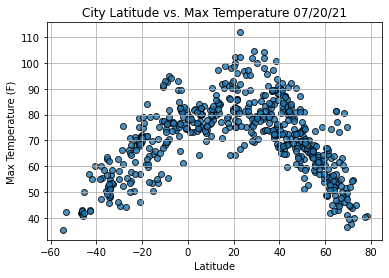

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

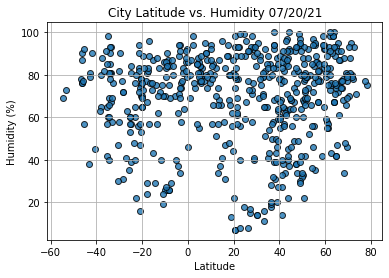

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

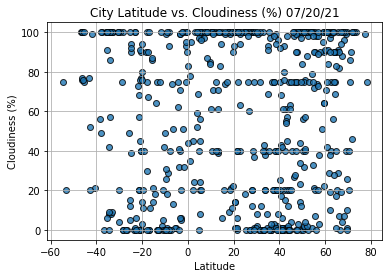

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

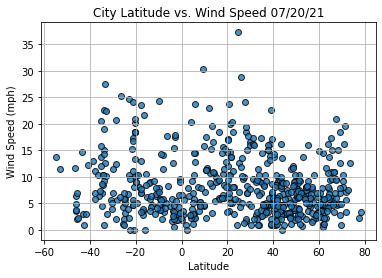

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [53]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

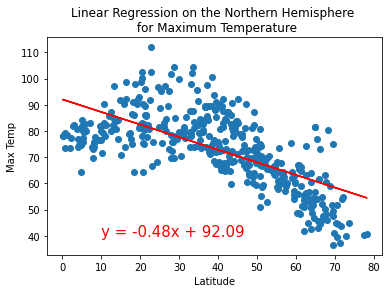

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

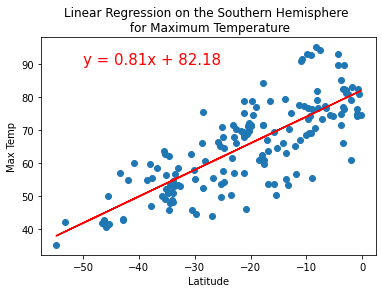

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

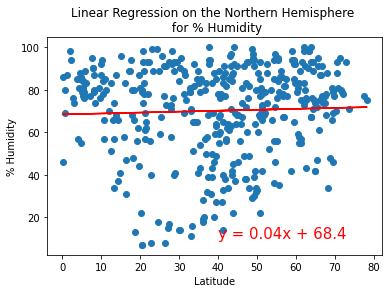

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

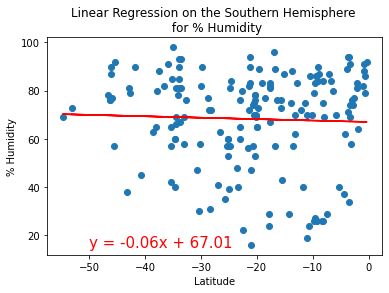

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

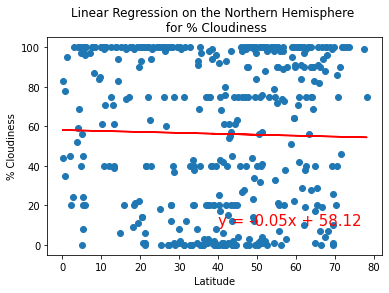

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

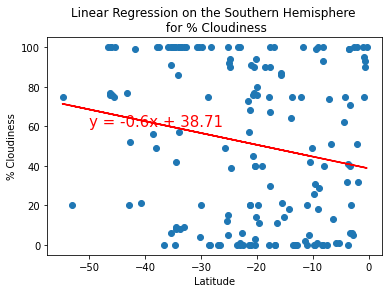

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

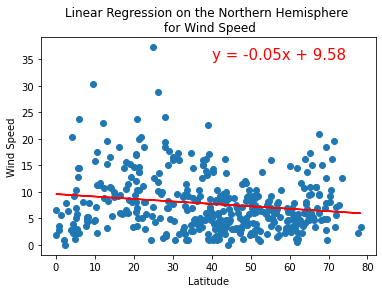

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

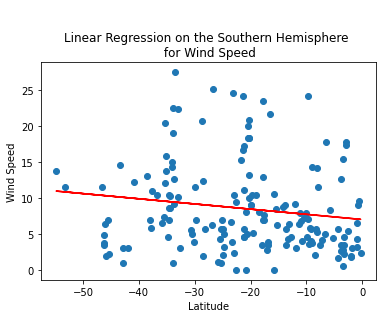

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))